In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

tweets = pd.read_csv('csv/train.csv')
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [2]:
tweets = tweets.fillna(value= 'Not Especified')

In [3]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
tweets['location'].value_counts()

Not Especified           2533
USA                       104
New York                   71
United States              50
London                     45
                         ... 
ECSU16                      1
UK  & Germany               1
Chicago Heights, IL         1
EGYPT                       1
proudly South African       1
Name: location, Length: 3342, dtype: int64

In [5]:
tweets['text lenght'] = tweets['text'].str.len()

In [6]:
tweets_by_loc = tweets[['location', 'target', 'text lenght']]

#esta linea genera un warning (de lo que lei es un falso positivo por que al hacer asignaciones encadenadas puede que el resultado no sea el esperado pero este no es el caso), no se arreglarlo
tweets_by_loc['cuantity'] = 1

tweets_by_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   location     7613 non-null   object
 1   target       7613 non-null   int64 
 2   text lenght  7613 non-null   int64 
 3   cuantity     7613 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 238.0+ KB


/home/hugo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [7]:
is_false = (tweets_by_loc.loc[:,'target'] == 0)
false_tweets = tweets_by_loc.loc[is_false]
false_tweets.head(15)

,location,target,text lenght,cuantity
15,Not Especified,0,14,1
16,Not Especified,0,13,1
17,Not Especified,0,16,1
18,Not Especified,0,17,1
19,Not Especified,0,28,1
20,Not Especified,0,22,1
21,Not Especified,0,17,1
22,Not Especified,0,11,1
23,Not Especified,0,21,1
24,Not Especified,0,8,1


In [8]:
tweets_by_loc = tweets_by_loc.groupby('location').sum()

In [9]:
tweets_by_loc.sample(n=10)

,target,text lenght,cuantity
location,,,
san gabriel la union,0,136,1
"Victoria, BC",2,254,3
"2,360 miles away",0,43,1
Inside the Beltway (DC Area),1,83,1
Planet of da Bathing Apes,1,34,1
"Fort Knox, KY 40121",1,81,1
Nice places,0,58,1
"South, England",1,127,1
"Sioux Falls, S.D.",1,90,1


In [10]:
tweets_by_loc_with_frecuency = tweets_by_loc.sort_values('target', ascending=False)

In [11]:
tweets_by_loc_with_frecuency.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3342 entries, Not Especified to Rutherfordton, NC
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   target       3342 non-null   int64
 1   text lenght  3342 non-null   int64
 2   cuantity     3342 non-null   int64
dtypes: int64(3)
memory usage: 104.4+ KB


In [12]:
tweets_by_loc_with_frecuency['Veracidad'] = tweets_by_loc_with_frecuency['target'] / tweets_by_loc_with_frecuency['cuantity']
tweets_by_loc_with_frecuency.head(10)

,target,text lenght,cuantity,Veracidad
location,,,,
Not Especified,1075,249413,2533,0.424398
USA,67,11285,104,0.644231
United States,27,5001,50,0.540000
Nigeria,22,3360,28,0.785714
India,20,2470,24,0.833333
Mumbai,19,2740,22,0.863636
New York,16,9234,71,0.225352
London,16,4820,45,0.355556
UK,16,3133,27,0.592593


In [13]:
cuantity_mean = tweets_by_loc['cuantity'].mean()
has_more_tweets_than_cuantity_mean = (tweets_by_loc_with_frecuency['cuantity'] > 10)
locations_with_more_than_10_tweets = tweets_by_loc_with_frecuency[has_more_tweets_than_cuantity_mean]
del locations_with_more_than_10_tweets['target']
locations_with_more_than_10_tweets = locations_with_more_than_10_tweets.sort_values('Veracidad', ascending =True)
locations_with_more_than_10_tweets = locations_with_more_than_10_tweets.reset_index()
locations_with_more_than_10_tweets.head(10)

,location,text lenght,cuantity,Veracidad
0,NYC,1406,12,0.166667
1,Everywhere,1335,15,0.200000
2,Florida,1540,14,0.214286
3,New York,9234,71,0.225352
4,Kenya,2635,20,0.250000
5,United Kingdom,1400,14,0.285714
6,"Los Angeles, CA",2969,26,0.307692
7,London,4820,45,0.355556
8,Seattle,1392,11,0.363636
9,Chicago,1229,11,0.363636


In [14]:
tweets_by_loc_with_frecuency = tweets_by_loc_with_frecuency.reset_index()
tweets_by_loc_with_frecuency.head()

,location,target,text lenght,cuantity,Veracidad
0,Not Especified,1075,249413,2533,0.424398
1,USA,67,11285,104,0.644231
2,United States,27,5001,50,0.540000
3,Nigeria,22,3360,28,0.785714
4,India,20,2470,24,0.833333


In [15]:
locations_with_more_than_10_tweets['Veracidad'] = locations_with_more_than_10_tweets['Veracidad'] * 100

Text(0.5, 1.0, 'Porcentaje de Veracidad de Tweets por Locacion')

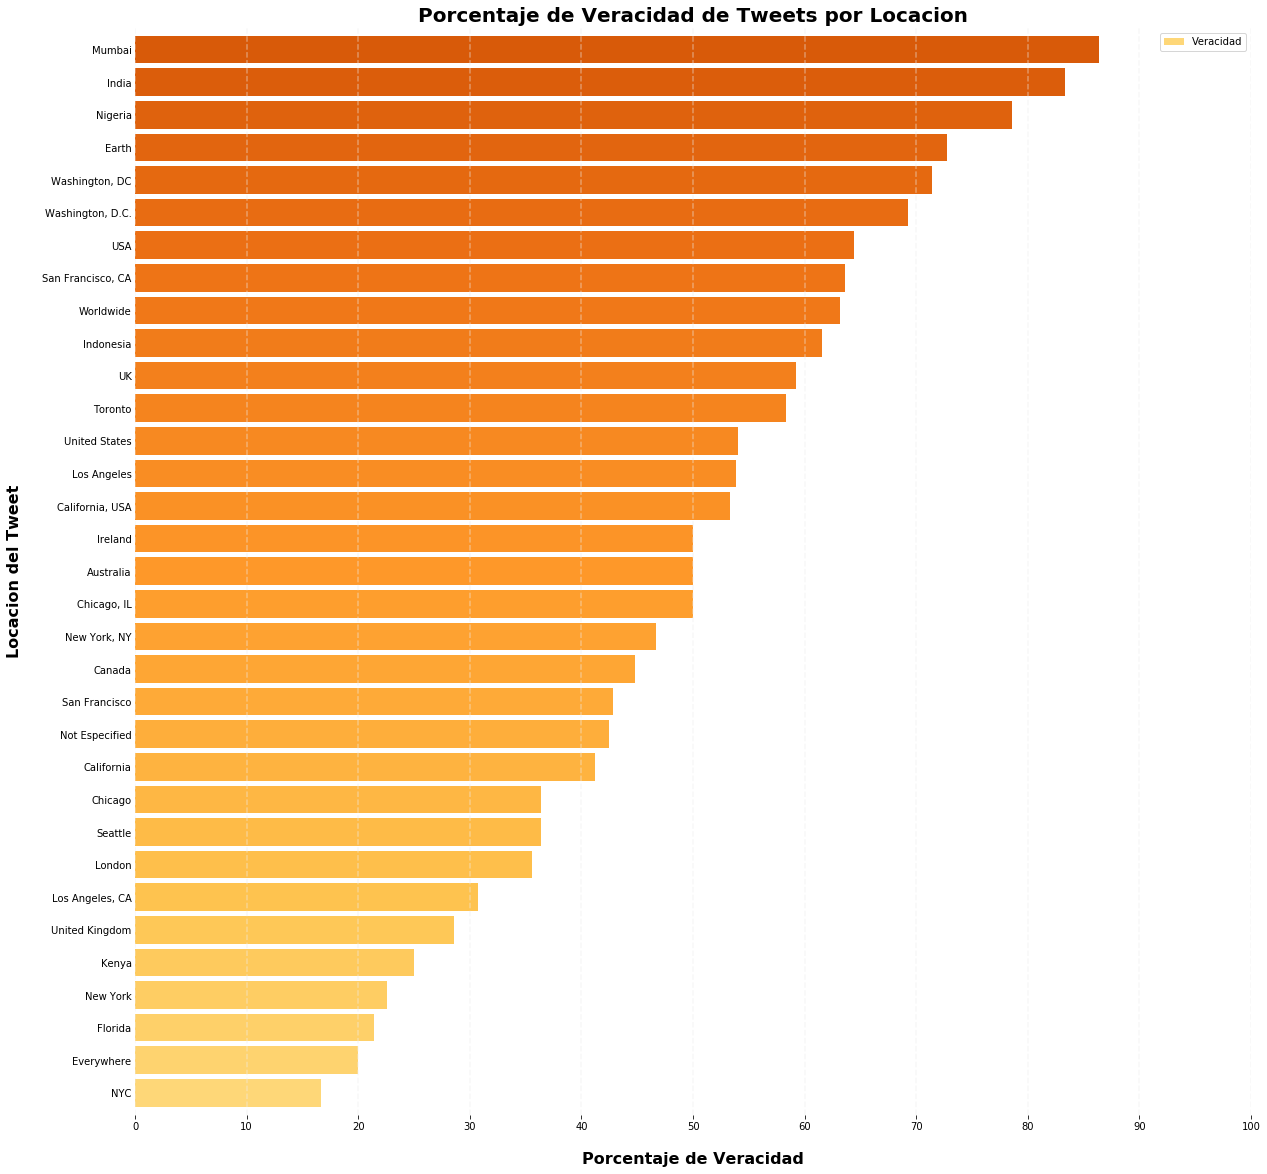

In [16]:

saltos = np.linspace(0.3, 0.7, 33)
colores = (cm.get_cmap('YlOrBr'))(saltos)
locations_with_more_than_10_tweets_plot = locations_with_more_than_10_tweets.plot(kind='barh', y ='Veracidad', x = 'location', figsize=(20,20), color=colores, width=0.85)

plt.xticks(np.arange(0, 100+1, 10.0))
plt.tick_params(axis='y', length=0)

locations_with_more_than_10_tweets_plot.spines['right'].set_visible(False)
locations_with_more_than_10_tweets_plot.spines['top'].set_visible(False)
locations_with_more_than_10_tweets_plot.spines['left'].set_visible(False)
locations_with_more_than_10_tweets_plot.spines['bottom'].set_visible(False)

lineas = locations_with_more_than_10_tweets_plot.get_xticks()
for i in lineas:
      locations_with_more_than_10_tweets_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
locations_with_more_than_10_tweets_plot.set_xlabel("Porcentaje de Veracidad", labelpad=20, weight='bold', size=16)
locations_with_more_than_10_tweets_plot.set_ylabel("Locacion del Tweet", labelpad=20, weight='bold', size=16)
locations_with_more_than_10_tweets_plot.set_title("Porcentaje de Veracidad de Tweets por Locacion", weight='bold', size=20)


In [17]:
tweets_by_loc_with_frecuency.head(10)

,location,target,text lenght,cuantity,Veracidad
0,Not Especified,1075,249413,2533,0.424398
1,USA,67,11285,104,0.644231
2,United States,27,5001,50,0.540000
3,Nigeria,22,3360,28,0.785714
4,India,20,2470,24,0.833333
5,Mumbai,19,2740,22,0.863636
6,New York,16,9234,71,0.225352
7,London,16,4820,45,0.355556
8,UK,16,3133,27,0.592593
9,"Washington, DC",15,2430,21,0.714286


In [18]:
top_10_tweets_by_loc = (tweets_by_loc_with_frecuency.loc[:,'target'] >= 15)
top_10 = tweets_by_loc_with_frecuency.loc[top_10_tweets_by_loc]
top_10.head(15)

,location,target,text lenght,cuantity,Veracidad
0,Not Especified,1075,249413,2533,0.424398
1,USA,67,11285,104,0.644231
2,United States,27,5001,50,0.540000
3,Nigeria,22,3360,28,0.785714
4,India,20,2470,24,0.833333
5,Mumbai,19,2740,22,0.863636
6,New York,16,9234,71,0.225352
7,London,16,4820,45,0.355556
8,UK,16,3133,27,0.592593
9,"Washington, DC",15,2430,21,0.714286


Text(0.5, 1.0, 'Top 10 de Locaciones con mayor cantidad de Tweets Verdaderos')

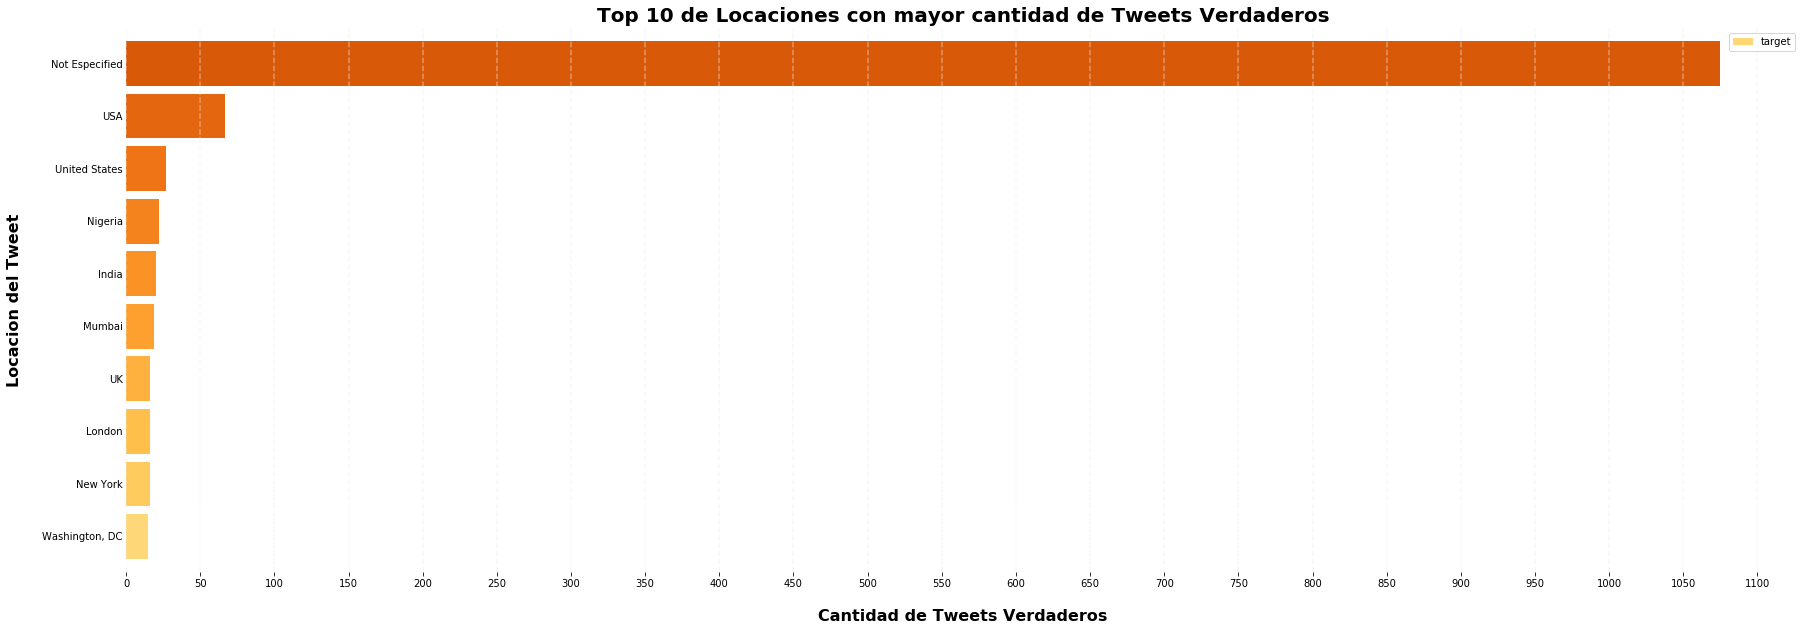

In [19]:
saltos = np.linspace(0.3, 0.7, 10)
colores = (cm.get_cmap('YlOrBr'))(saltos)
top_10 = top_10.sort_values('target')
top10_plot = top_10.plot(kind='barh', y ='target', x = 'location', figsize=(30,10), color=colores, width=0.85)

plt.xticks(np.arange(0, 1101, 50.0))
plt.tick_params(axis='y', length=0)

top10_plot.spines['right'].set_visible(False)
top10_plot.spines['top'].set_visible(False)
top10_plot.spines['left'].set_visible(False)
top10_plot.spines['bottom'].set_visible(False)

lineas = top10_plot.get_xticks()
for i in lineas:
      top10_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
top10_plot.set_xlabel("Cantidad de Tweets Verdaderos", labelpad=20, weight='bold', size=16)
top10_plot.set_ylabel("Locacion del Tweet", labelpad=20, weight='bold', size=16)
top10_plot.set_title("Top 10 de Locaciones con mayor cantidad de Tweets Verdaderos", weight='bold', size=20)

In [20]:
del false_tweets['target']
false_tweets.sample(n=15)

,location,text lenght,cuantity
762,Not Especified,26,1
5469,"Mumbai, Maharashtra",121,1
2271,"ÌÏT: 0.0,0.0",136,1
1690,"Pennsylvania, USA",137,1
7083,"Atlanta, GA",136,1
6536,Auburn,41,1
6467,Not Especified,134,1
7374,Florida USA,102,1
463,Û¢FLGÛ¢,95,1
2119,Home of the Takers.,44,1


In [21]:
false_tweets = false_tweets.groupby('location').sum()
false_tweets = false_tweets.sort_values('cuantity', ascending = True)
false_tweets = false_tweets.reset_index()
false_tweets.tail(10)

,location,text lenght,cuantity
2133,UK,1187,11
2134,Everywhere,1067,12
2135,Kenya,2024,15
2136,Canada,1652,16
2137,"Los Angeles, CA",2038,18
2138,United States,2248,23
2139,London,3032,29
2140,USA,4400,37
2141,New York,7289,55
2142,Not Especified,134058,1458


Text(0.5, 1.0, 'Top 10 de Locaciones con mayor cantidad de Tweets Falsos')

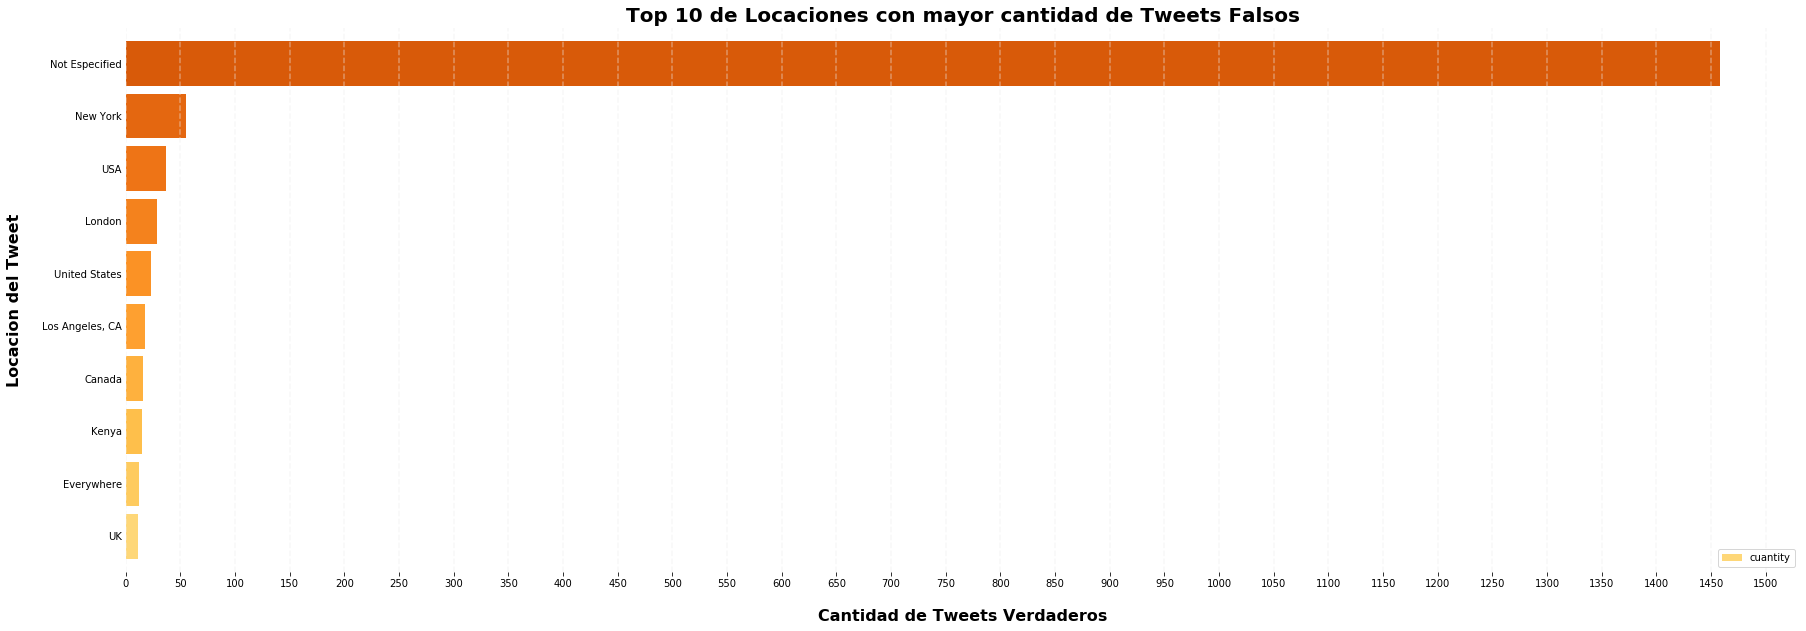

In [22]:
saltos = np.linspace(0.3, 0.7, 10)
colores = (cm.get_cmap('YlOrBr'))(saltos)
top10_plot = false_tweets.tail(10).plot(kind='barh', y ='cuantity', x = 'location', figsize=(30,10), color=colores, width=0.85)

plt.xticks(np.arange(0, 1501, 50.0))
plt.tick_params(axis='y', length=0)

top10_plot.spines['right'].set_visible(False)
top10_plot.spines['top'].set_visible(False)
top10_plot.spines['left'].set_visible(False)
top10_plot.spines['bottom'].set_visible(False)

lineas = top10_plot.get_xticks()
for i in lineas:
      top10_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
top10_plot.set_xlabel("Cantidad de Tweets Verdaderos", labelpad=20, weight='bold', size=16)
top10_plot.set_ylabel("Locacion del Tweet", labelpad=20, weight='bold', size=16)
top10_plot.set_title("Top 10 de Locaciones con mayor cantidad de Tweets Falsos", weight='bold', size=20)

In [23]:
locations_with_more_than_10_tweets['text lenght mean'] = locations_with_more_than_10_tweets['text lenght'] / locations_with_more_than_10_tweets['cuantity']
locations_with_more_than_10_tweets = locations_with_more_than_10_tweets.sort_values('text lenght mean')
locations_with_more_than_10_tweets.head()

,location,text lenght,cuantity,Veracidad,text lenght mean
1,Everywhere,1335,15,20.000000,89.000000
25,"San Francisco, CA",994,11,63.636364,90.363636
11,Not Especified,249413,2533,42.439795,98.465456
23,Indonesia,1292,13,61.538462,99.384615
5,United Kingdom,1400,14,28.571429,100.000000


Text(0.5, 1.0, 'Longitud Promedio de Tweets Por Locacion ')

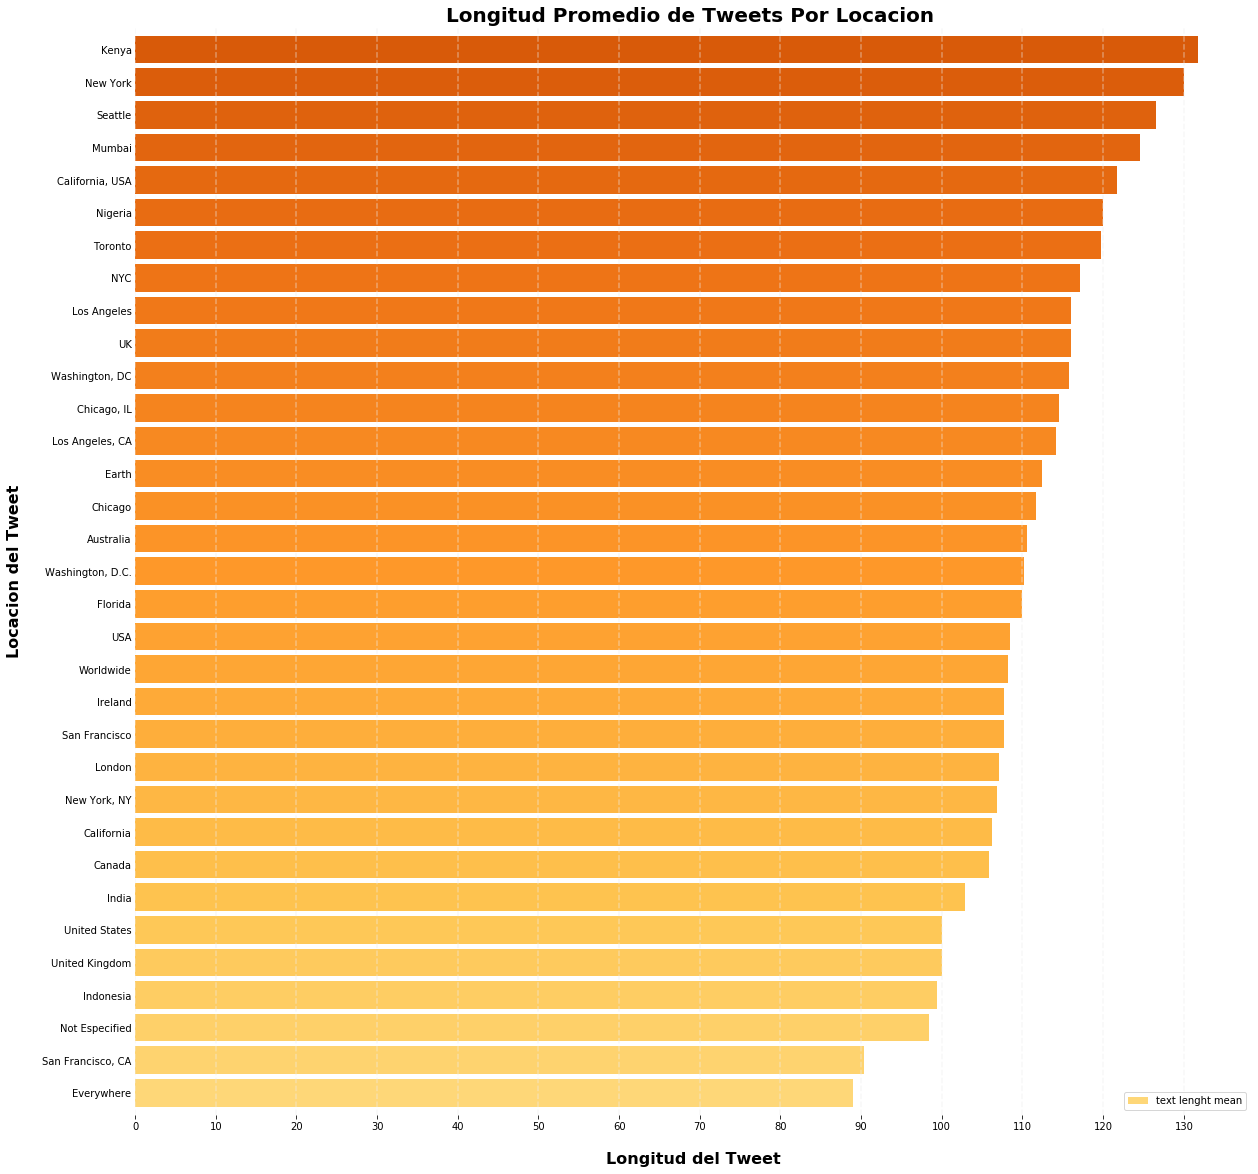

In [24]:
saltos = np.linspace(0.3, 0.7, 33)
colores = (cm.get_cmap('YlOrBr'))(saltos)
locations_with_more_than_10_tweets_plot = locations_with_more_than_10_tweets.plot(kind='barh', y ='text lenght mean', x = 'location', figsize=(20,20), color=colores, width=0.85)

plt.xticks(np.arange(0, 130+1, 10.0))
plt.tick_params(axis='y', length=0)

locations_with_more_than_10_tweets_plot.spines['right'].set_visible(False)
locations_with_more_than_10_tweets_plot.spines['top'].set_visible(False)
locations_with_more_than_10_tweets_plot.spines['left'].set_visible(False)
locations_with_more_than_10_tweets_plot.spines['bottom'].set_visible(False)

lineas = locations_with_more_than_10_tweets_plot.get_xticks()
for i in lineas:
      locations_with_more_than_10_tweets_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
locations_with_more_than_10_tweets_plot.set_xlabel("Longitud del Tweet", labelpad=20, weight='bold', size=16)
locations_with_more_than_10_tweets_plot.set_ylabel("Locacion del Tweet", labelpad=20, weight='bold', size=16)
locations_with_more_than_10_tweets_plot.set_title("Longitud Promedio de Tweets Por Locacion ", weight='bold', size=20)

In [25]:
tweets_by_loc_and_keyword = tweets[['location', 'keyword']]


In [26]:
tweets_by_loc_and_keyword['cuantity'] = 1 
tweets_by_loc_and_keyword = tweets_by_loc_and_keyword.groupby(['location', 'keyword']).sum()
tweets_by_loc_and_keyword.sample(n=10)

/home/hugo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,,cuantity
location,keyword,
"Minority Privilege, USA",suicide%20bombing,1
Dundee,landslide,1
MAD as Hell,demolish,1
"Mankato, MN",chemical%20emergency,1
london essex england uk,loud%20bang,1
"Los Angeles, CA",riot,2
Kaneohe,crush,1
"Coconut Creek, Florida",drown,1
SÌ£o Paulo,fire,1


In [27]:
mean_cuantity = tweets_by_loc_and_keyword['cuantity'].mean()

In [28]:
top_10_tweets_by_loc = (tweets_by_loc_and_keyword.loc[:,'cuantity'] >= mean_cuantity)
top_10 = tweets_by_loc_and_keyword.loc[top_10_tweets_by_loc]
top_10 = top_10.sort_values('cuantity', ascending = False)
top_10.head()

cuantity
location       keyword                   
Not Especified Not Especified          61
               razed                   25
               detonation              24
               explosion               21
               suicide%20bomber        20

In [29]:
Nuevo = top_10.drop('Not Especified', axis=0, level=0)
Nuevo.head()

,,cuantity
location,keyword,
USA,sandstorm,17
Kenya,loud%20bang,16
New York,flood,13
ss,arsonist,10
Mumbai,wreckage,10


In [30]:
for_heatmap = Nuevo.head(25).pivot_table(index='location', columns='keyword', values='cuantity')
for_heatmap = for_heatmap.fillna(value = 0)
for_heatmap

keyword,aftershock,ambulance,armageddon,arsonist,body%20bag,chemical%20emergency,crush,derail,derailed,derailment,...,displaced,flood,hail,hazardous,hellfire,loud%20bang,sandstorm,suicide%20bomb,tsunami,wreckage
location,,,,,,,,,,,,,,,,,,,,,
Road to the Billionaires Club,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
304,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"California, United States",0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Denver, Colorado",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
Everywhere,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Happily Married with 2 kids,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kenya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0
"Morioh, Japan",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(68.99999999999999, 0.5, 'Locacion')

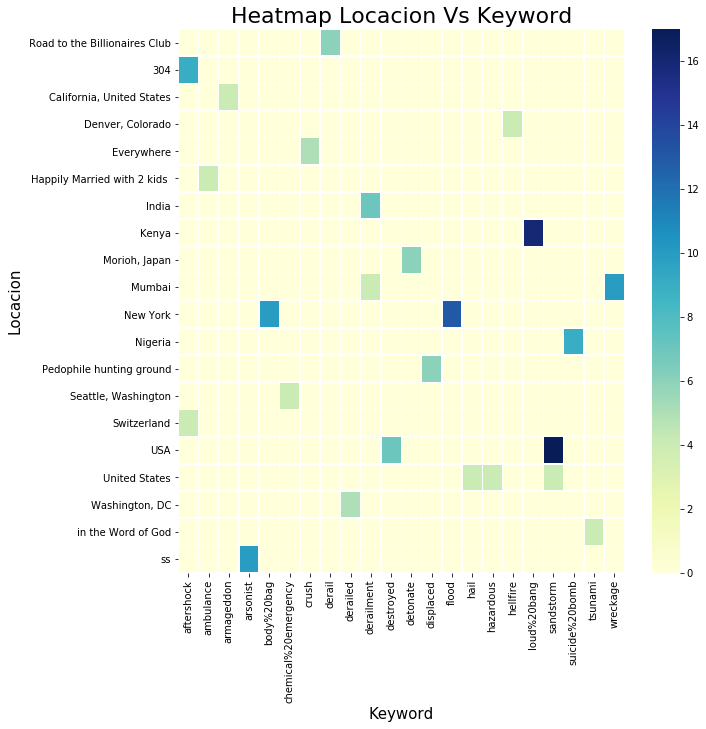

In [31]:
import seaborn as sns
plt.figure(figsize=(10, 10))
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="YlGnBu")
g.set_title("Heatmap Locacion Vs Keyword", fontsize=22)
g.set_xlabel("Keyword",fontsize=15)
g.set_ylabel("Locacion", fontsize=15)